# EDA of Covid data for Mecklenburg County
---
** WORK IN PROGRESS **
- Author: Laura Dahlberg
- Created on: January 8, 2021

### About the Data:
This dataset was based on the "Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)" To access this dataset you need to request permission from the [CDC](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Restricted-Access-Detai/mbd7-r32t) <br>
<br>
CDC disclosure: "The CDC does not take responsibility for the scientific validity or accuracy of methodology, results, statistical analyses, or conclusions presented." 

In [1]:
import shutil
import datetime
from dateutil import relativedelta
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import cm
%matplotlib inline

In [2]:
ROOT = Path("./")
DATA = ROOT/'data'
IMAGES = ROOT/'images'
# [f for f in ROOT.iterdir()]
# [f for f in DATA.iterdir()]

print('ROOT =', ROOT)
print('DATA =', DATA)
print('IMAGES =', IMAGES)

ROOT = .
DATA = data
IMAGES = images


In [3]:
%ls {DATA}

 Volume in drive C has no label.
 Volume Serial Number is FCBC-A9FB

 Directory of C:\Users\laura\covid-19\covid-19_analysis_NC\data

01/08/2021  08:20 PM    <DIR>          .
01/08/2021  08:20 PM    <DIR>          ..
01/07/2021  10:10 PM        15,318,162 MECK_COVID_Cases_Restricted_Detailed_12312020.csv
01/15/2021  09:49 AM             8,371 weekly_covid19_report_mecknc.csv
               2 File(s)     15,326,533 bytes
               2 Dir(s)  282,363,523,072 bytes free


### 0. Reading File

In [4]:
df = pd.read_csv(DATA/'MECK_COVID_Cases_Restricted_Detailed_12312020.csv')
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55801 entries, 0 to 55800
Data columns (total 32 columns):
race_ethnicity_combined    55645 non-null object
current_status             55801 non-null object
cdc_case_earliest_dt       55801 non-null object
cdc_report_dt              55801 non-null object
sex                        55767 non-null object
onset_dt                   22927 non-null object
pos_spec_dt                55784 non-null object
hosp_yn                    55801 non-null object
icu_yn                     55801 non-null object
death_yn                   55801 non-null object
hc_work_yn                 55586 non-null object
pna_yn                     55801 non-null object
abxchest_yn                55801 non-null object
acuterespdistress_yn       55801 non-null object
mechvent_yn                55801 non-null object
fever_yn                   55801 non-null object
sfever_yn                  55801 non-null object
chills_yn                  55801 non-null object
myalgia_y

### Looking at the Data

This is one row of the data to get an idea of what I'm working with.

In [5]:
# df.head(1).T

In [6]:
df.death_yn.unique()

array(['No', 'Missing', 'Yes', 'Unknown'], dtype=object)

### Totals Covid Outcomes - All Ages
Deaths and Survivals

In [7]:
## Total Deaths and Survivals
total_d = pd.DataFrame(df['death_yn'].value_counts())
total_d['percentage']= df['death_yn'].value_counts(normalize=True).round(4)*(100)
total_d = total_d.rename(columns={'death_yn': 'count'}, index={'No': 'Surv', 'Yes': 'Deaths'})
## this column will be used to create chart labels next/above bars
total_d['label'] = total_d['count'].astype(str) + "\n(" + total_d['percentage'].astype(str) + "%)"
total_d

,count,percentage,label
Surv,55238,98.99,55238\n(98.99%)
Deaths,544,0.97,544\n(0.97%)
Missing,18,0.03,18\n(0.03%)
Unknown,1,0.00,1\n(0.0%)


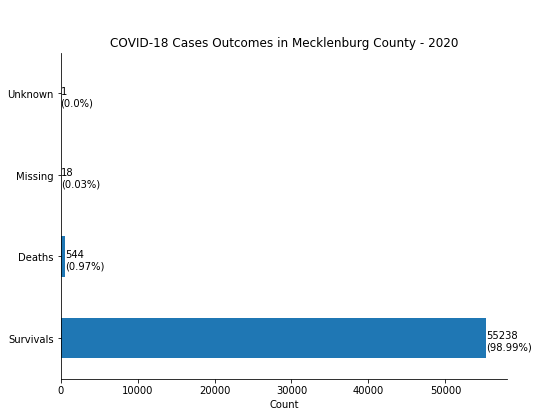

In [8]:
# perc_val #.sort_values('count', ascending=True)\
ax = total_d.plot(y=['count'], kind='barh',
                  legend=False,
                  figsize=(8,6),
                  title='\n\nCOVID-18 Cases Outcomes in Mecklenburg County - 2020')

# text for chart
label_per = [s for s in total_d['label']]
#print(label_per) # like ['55238, 98.99%', '544, 0.97%', '18, 0.03%', '1, 0.0%']

ax.set_yticklabels(['Survivals', 'Deaths', 'Missing', 'Unknown'])
ax.set_xlabel('Count')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Add labels next to bars - count and percentage ----- https://stackoverflow.com/questions/61718127/add-percent-and-count-values-to-each-bar-in-pandas-barplot
for i, p in enumerate(ax.patches):
    #print(i, f'{label_per[i]}', p)
    ax.text(p.get_width()+1, p.get_y()+.1, str(f'{label_per[i]}'), fontsize=10)

## Save chart as png file https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror
# ax.figure.savefig(IMAGES/'cases_outcomes_meck.png' )

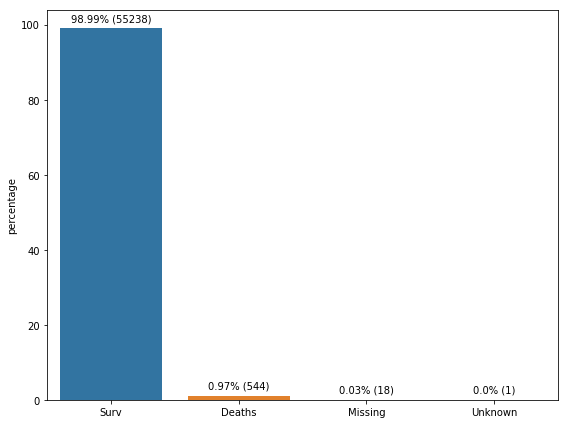

In [9]:
## another way to plot total_d with labels
## https://stackoverflow.com/questions/65655829/absolute-values-and-percentage-values-side-by-side-in-bar-chart-matplotlib/65725322#65725322
x_axis = total_d.index
# x_axis = ['MJO Active', 'MJO Inactive']
# x_axis
y_axis = total_d['percentage']
# y_axis

fig, ax = plt. subplots(figsize=(8,6))
rects = sns.barplot(x_axis, y_axis, linewidth=0)

values = total_d['count']

for rect, perc, vals in zip(rects.patches, y_axis, values):
    rects.annotate(f"{perc}% ({vals})", (rect.get_x() + rect.get_width() / 2., rect.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0,10),
                  textcoords='offset points')
plt.tight_layout()

### Total Covid Outcomes by Age Group
---
Deaths and Survivals


In [10]:
## totals by age group (tba)
tba = df.groupby(['age_group','death_yn'])['death_yn'].count().unstack().fillna(0) #.reset_index()
tba = tba.rename(columns = {'No': 'surv', 'Yes':'deaths'})
tba[['Missing', 'surv', 'Unknown', 'deaths']] = tba[['Missing', 'surv', 'Unknown', 'deaths']].astype(int)
## Add Grand total
tba['total'] = tba[['Missing', 'surv', 'Unknown', 'deaths']].sum(axis=1).astype(int)

## percentages for missing (miss_p) survival (surv_p),  unknown (unkn_p), deaths (dths_p), total (totl_p)
## percentages by row, within each age group
tba['miss_p'] = ((tba['Missing']*100)/tba['total']).round(1)
tba['surv_p'] = ((tba['surv']*100)/tba['total']).round(1)
tba['unkn_p'] = ((tba['Unknown']*100)/tba['total']).round(1)
tba['dths_p'] = ((tba['deaths']*100)/tba['total']).round(1)
tba['totl_p'] = (tba['total']*100)/tba['total']

## this column will be used to create chart labels next/above bars
# example: total_d['label'] = total_d['count'].astype(str) + "\n(" + total_d['percentage'].astype(str) + "%)"
tba['label_1'] = tba['surv'].astype(str) + "  (" + tba['surv_p'].astype(str) + "%)"
tba.reset_index()

death_yn,age_group,Missing,surv,Unknown,deaths,total,miss_p,surv_p,unkn_p,dths_p,totl_p,label_1
0,0 - 9 Years,1,2904,0,0,2905,0.0,100.0,0.0,0.0,100.0,2904 (100.0%)
1,10 - 19 Years,4,5715,0,0,5719,0.1,99.9,0.0,0.0,100.0,5715 (99.9%)
2,20 - 29 Years,8,13493,1,2,13504,0.1,99.9,0.0,0.0,100.0,13493 (99.9%)
3,30 - 39 Years,2,10749,0,3,10754,0.0,100.0,0.0,0.0,100.0,10749 (100.0%)
4,40 - 49 Years,0,8701,0,22,8723,0.0,99.7,0.0,0.3,100.0,8701 (99.7%)
5,50 - 59 Years,1,7015,0,46,7062,0.0,99.3,0.0,0.7,100.0,7015 (99.3%)
6,60 - 69 Years,1,3800,0,70,3871,0.0,98.2,0.0,1.8,100.0,3800 (98.2%)
7,70 - 79 Years,1,1754,0,145,1900,0.1,92.3,0.0,7.6,100.0,1754 (92.3%)
8,80+ Years,0,1091,0,256,1347,0.0,81.0,0.0,19.0,100.0,1091 (81.0%)


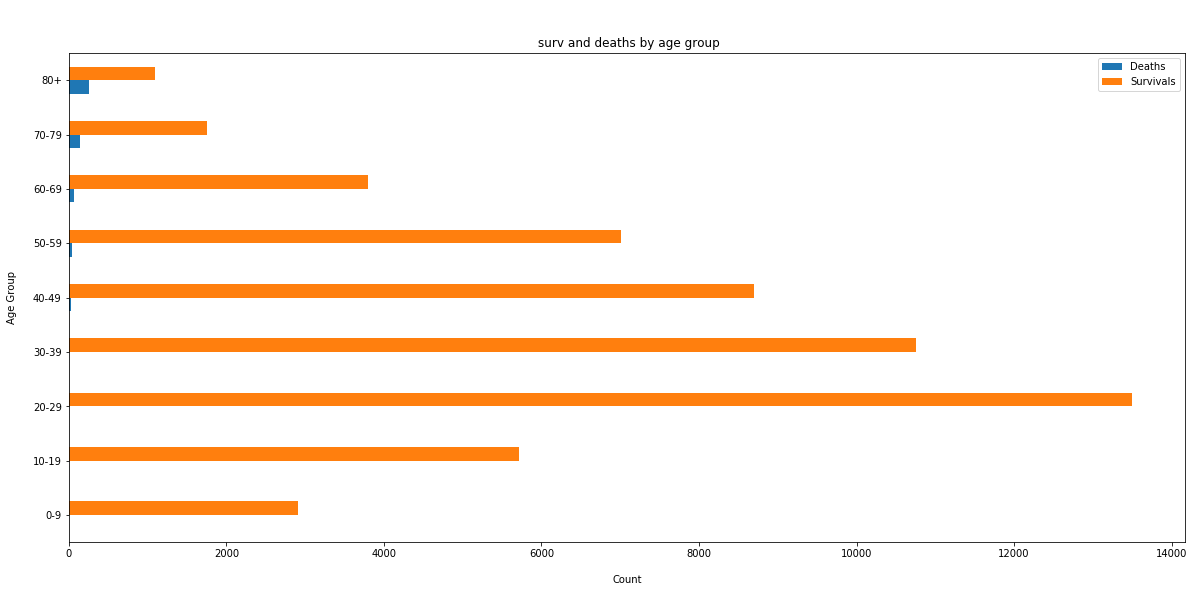

In [11]:
## plotting tba
# ax = tba.plot(x='age_group', y=['surv_p', 'dths_p'],
#                 kind='bar',
#                 figsize=(20,9),
#                 rot=0,
#                 title= '\n\nDeaths vs Survivals Rate by Age Group\n')

# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
#     ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
    
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
# ax.legend(['Survival Rate', 'Death Rate']);

ax = tba.plot(y=['deaths', 'surv'],
             kind='barh',
             figsize=(20,9),
              rot=0,
             title= '\n\n surv and deaths by age group')

ax.set_yticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax.legend(['Deaths', 'Survivals']);
ax.set_xlabel('\nCount');
ax.set_ylabel('Age Group\n');

# label_surv = [s for s in tba['label_1']]

## Add labels next to bars - count and percentage ----- https://stackoverflow.com/questions/61718127/add-percent-and-count-values-to-each-bar-in-pandas-barplot
# for i, p in enumerate(ax.patches):
#     #print(i, f'{label_per[i]}', p)
#     ax.text(p.get_width()+1, p.get_y()+.1, str(f'{label_surv[i]}'), fontsize=10)

# ax.figure.savefig(IMAGES/'death_yn_age.png' )

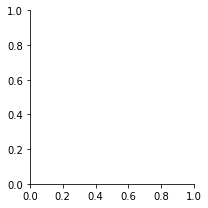

In [12]:
## plot tba with seaborn
sns.FacetGrid(data=tba.reset_index(), hue='age_group')


# ax = plt.subplots(figsize =(20,6))
# ax = sns.barplot(x='age_group', y='deaths', data=tba.reset_index())
# ax = sns.barplot(x='age_group', y='surv', data=tba.reset_index())

In [13]:
# tba.head()

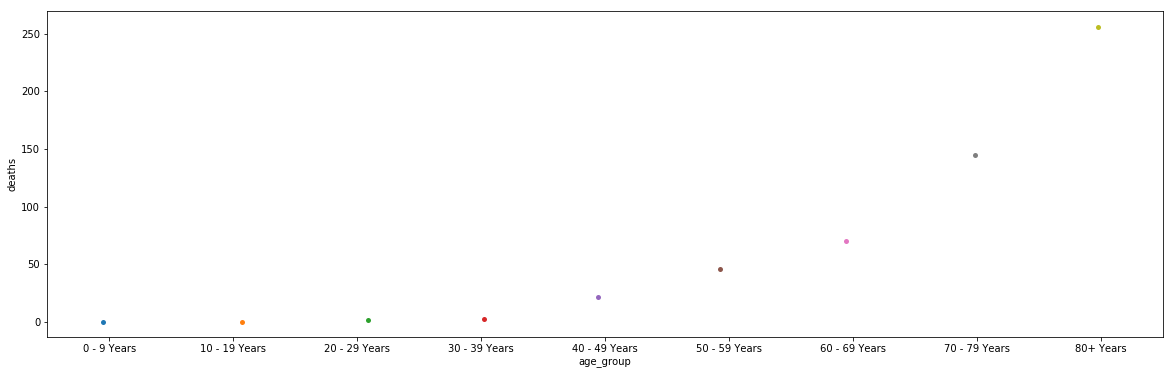

In [14]:
## TO DO ##
## scatter plot death count by age -- maybe different colors for underlying conditions
## check out https://seaborn.pydata.org/generated/seaborn.stripplot.html

ax = plt.subplots(figsize =(20,6))
ax = sns.stripplot(x='age_group', y='deaths', data=tba.reset_index())


In [15]:
## percentage for one group from all ages (tba_p)

# tba_p = (tba*100/tba.sum()).round(1) #.reset_index()
# tba_p["y"] = 0
# tba_p
# tba_p.dtypes

In [16]:
# vals = tba_p['deaths'].tolist()
# vals

In [17]:
##*** NEED TO FIND BETTER GRAPH FOR THIS DATA ***
##plotting comparison of deaths percentages by age group 

# ax = tba_p.plot(x='age_group', y=['deaths'], legend=False,
#                 kind='bar',
#                 figsize=(20,9),
#                 rot=0,
#                 title= '\n\nDeaths Percentage by Age Group Out of all Deaths')

# for idx, label in enumerate(vals):
#     value = label
#     ax.annotate(value,
#                (idx, value),
#                xytext=(-10, 4),
#                textcoords='offset points')

    
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
# ax.legend(['Death %']);

In [18]:
# x = tba_p.index
# y = tba_p['y']
# z = tba_p['deaths']
# plt.figure(figsize=(20,9))
# plt.scatter(x=x, y=y, s=z*100, alpha=0.5)


### Deaths Percentage by Age


In [19]:
## renaming some columns for easy understanding
# tba = tba.rename(columns = {'No': 'surv', 'Yes':'deaths'}).reset_index()
# # tba
# # tba.dtypes

# ## percentages for missing (miss_p) survival (surv_p),  unknown (unkn_p), deaths (dths_p), total (totl_p)
# ## percentages by row, within each age group
# tba['miss_p'] = ((tba['Missing']*100)/tba['total']).round(1)
# tba['surv_p'] = ((tba['surv']*100)/tba['total']).round(1)
# tba['unkn_p'] = ((tba['Unknown']*100)/tba['total']).round(1)
# tba['dths_p'] = ((tba['deaths']*100)/tba['total']).round(1)
# tba['totl_p'] = (tba['total']*100)/tba['total']
# tba=tba.reset_index()
tba = tba.reset_index()
tba

death_yn,age_group,Missing,surv,Unknown,deaths,total,miss_p,surv_p,unkn_p,dths_p,totl_p,label_1
0,0 - 9 Years,1,2904,0,0,2905,0.0,100.0,0.0,0.0,100.0,2904 (100.0%)
1,10 - 19 Years,4,5715,0,0,5719,0.1,99.9,0.0,0.0,100.0,5715 (99.9%)
2,20 - 29 Years,8,13493,1,2,13504,0.1,99.9,0.0,0.0,100.0,13493 (99.9%)
3,30 - 39 Years,2,10749,0,3,10754,0.0,100.0,0.0,0.0,100.0,10749 (100.0%)
4,40 - 49 Years,0,8701,0,22,8723,0.0,99.7,0.0,0.3,100.0,8701 (99.7%)
5,50 - 59 Years,1,7015,0,46,7062,0.0,99.3,0.0,0.7,100.0,7015 (99.3%)
6,60 - 69 Years,1,3800,0,70,3871,0.0,98.2,0.0,1.8,100.0,3800 (98.2%)
7,70 - 79 Years,1,1754,0,145,1900,0.1,92.3,0.0,7.6,100.0,1754 (92.3%)
8,80+ Years,0,1091,0,256,1347,0.0,81.0,0.0,19.0,100.0,1091 (81.0%)


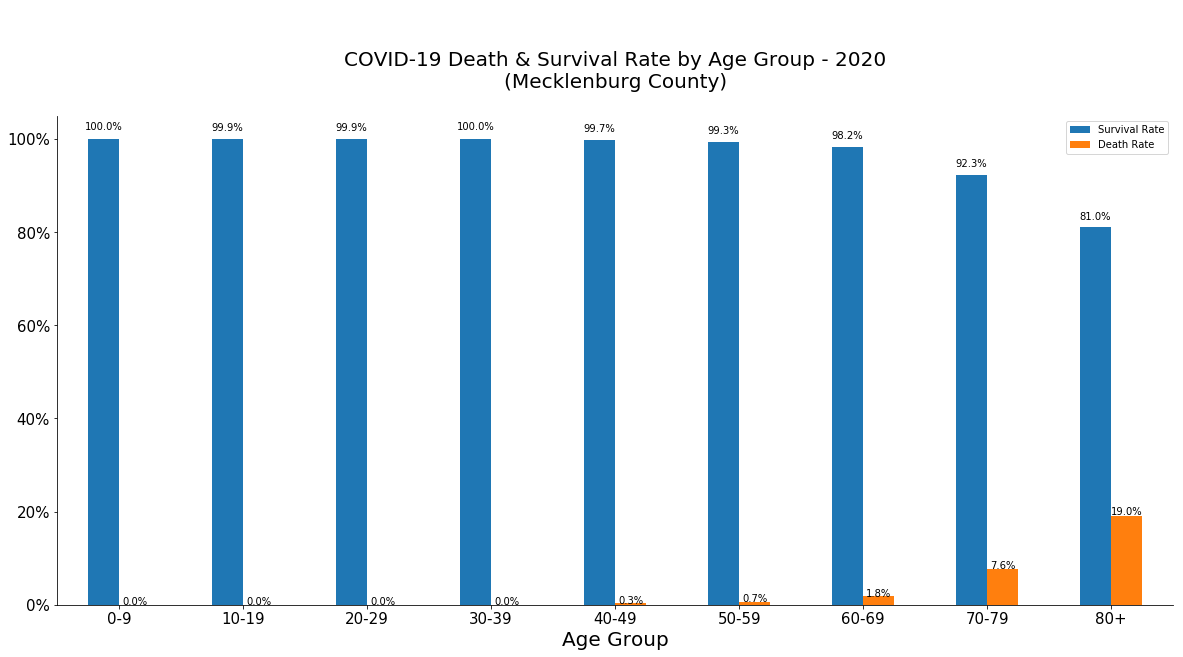

In [20]:
## plotting 

ax = tba.reset_index().plot(x='age_group', y=['surv_p', 'dths_p'],
                kind='bar',
                figsize=(20,9),
                rot=0,
                fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
    
ax.set_title('\n\nCOVID-19 Death & Survival Rate by Age Group - 2020\n(Mecklenburg County)\n', fontsize =20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax.set_xlabel('Age Group', fontsize=20)
ax.legend(['Survival Rate', 'Death Rate']);
## label group barchart: https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Save chart as png file
# ax.figure.savefig(IMAGES/'d_s_rate-by_age.png' )

In [21]:
np.arange(5)

array([0, 1, 2, 3, 4])

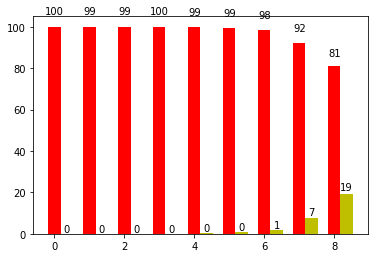

In [22]:
## *** WORK IN PROGRESS ***

# N = 5
# men_means = (20, 35, 30, 35, 27)
# men_std = (2, 3, 4, 1, 2)

# ind = np.arange(N)
# width = 0.35

# fig, ax = plt.subplots()
# rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

##********
N = 9 ##number of bars
survi = tba['surv_p'] ## survivals

ind = np.arange(N) ## x location for the group bars
width = 0.35 ## width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, survi, width, color='r', label='surv') ## survivals plot

deaths = tba['dths_p'] ## deaths
rects2 = ax.bar(ind + width, deaths, width, color='y', label='deaths') ## deaths plot


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05 * height,
               '%d' % int(height),
               ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

# values = tba['surv']
# def autolabel(rects):
#     for rect, sur, dth, vals in zip(rects.patches, survi, deaths, values):
#         rects.annotate(f"{sur}% ({vals})",(rect.get_x() + rect.get_width() /2., rect.get_height()),
#                        ha='center', va='center', fontsize=20, color='black', xytext=(0, 10),
#                        textcoords='offset points')

# autolabel(rects1)
# autolabel(rects2)

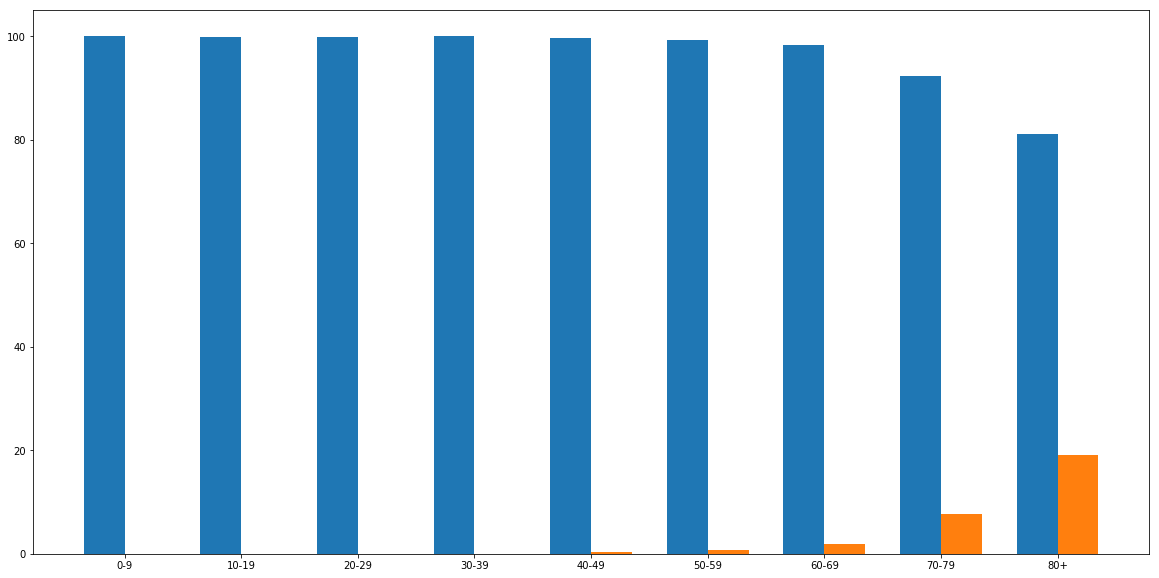

In [23]:
## *** WORK IN PROGRESS ***

##********
plt.figure(figsize=(20,10))
width = 0.35 ## width of bars
tick_label=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
x_axis = tba['age_group']
# x_axis
survi = tba['surv_p'] ## survivals
# survi
deaths = tba['dths_p'] ## deaths
# deaths
bar1 = np.arange(len(x_axis)) ## x location for the group bars
bar2 = [i+width for i in bar1]

plt.bar(bar1, survi, width, label='suvivals')
plt.bar(bar2, deaths, width, label='deaths')
plt.xticks(bar1+width/2, tick_label);


# fig, ax = plt.subplots()
# rects1 = ax.bar(ind, survi, width, color='r', label='surv') ## survivals plot


# rects2 = ax.bar(ind + width, deaths, width, color='y', label='deaths') ## deaths plot


# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05 * height,
#                '%d' % int(height),
#                ha='center', va='bottom')
# autolabel(rects1)
# autolabel(rects2)

In [24]:
## ***WORK IN PROGRESS***
## another way to plot tba survivals and deaths percentage with labels
## https://stackoverflow.com/questions/65655829/absolute-values-and-percentage-values-side-by-side-in-bar-chart-matplotlib/65725322#65725322

# x_axis = tba['age_group']
# # x_axis = ['MJO Active', 'MJO Inactive']
# # x_axis
# y_axis = tba['surv_p', 'dths_p']

# # fig, ax = plt. subplots(figsize=(20,9))
# # rects = sns.barplot(x_axis, y_axis, linewidth=0)

# ax = tba.plot(x= x_axis, y= y_axis,
#                 kind='bar',
#                 figsize=(20,9),
#                 rot=0,
#                 title= '\n\nDeaths vs Survivals Rate by Age Group\n')


# values = tba['surv', 'deaths']

# for rect, perc, vals in zip(rects.patches, y_axis, values):
#     rects.annotate(f"{perc}% ({vals})", (rect.get_x() + rect.get_width() / 2., rect.get_height()),
#                   ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
#                   textcoords='offset points')

# # for rect, perc, vals in zip(rects.patches, y_axis, values):
# #     rects.annotate(f"{perc}% ({vals})", (rect.get_x() + rect.get_width() / 2., rect.get_height()),
# #                   ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
# #                   textcoords='offset points')
# plt.tight_layout()

In [25]:
## calculating and plotting  monthly Death percentage by age bracket 
# tba[['Missing', 'surv', 'Unknown', 'deaths']].sum().astype(int)

## gettinga of each column
total_counts = pd.DataFrame(tba[['Missing', 'surv', 'Unknown', 'deaths']].sum().astype(int)).T
total_counts

## getting percentages



death_yn,Missing,surv,Unknown,deaths
0,18,55222,1,544


<br><br>

### Deaths by Age Bracket
---


In [26]:
## Filtering rows where 'death_yn' is 'yes'
deaths = df[(df['death_yn'].str.contains('Yes'))]
# deaths['count'] = 1


# deaths.dtypes
# deaths.death_yn.unique()


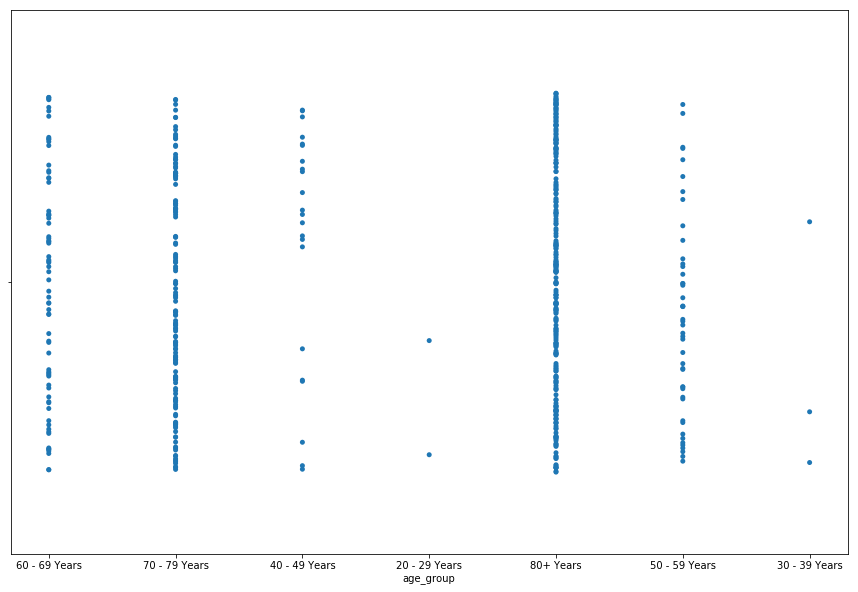

In [27]:
## TO DO ##
## scatter plot death count by age --plot all cases -- maybe different colors for underlying condition
ax = plt.subplots(figsize=(15,10))

## stripplot
ax = sns.stripplot(x='age_group', hue='death_yn', data=deaths, jitter=0.35)
# ax= sns.stripplot(x='death_yn', y='age_group', data=deaths) ## gets error

## countplot https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas
# ax = sns.countplot(y='death_yn', hue='age_group', data=deaths)


In [28]:
## rows where 'death_yn' is yes or no

deaths_yn = df[(df['death_yn'].str.contains('Yes') & df['death_yn'].str.contains('No'))]
deaths_yn = df[(df.death_yn.isin(['Yes', 'No']))]
# deaths_yn[deaths['age_group'].isnull()]
deaths_yn = pd.DataFrame(deaths_yn)
deaths_yn['death_yn_c'] = deaths_yn['death_yn'].map({'Yes': 1, 'No': 0})
deaths_yn['icu_yn_c'] = deaths_yn['icu_yn'].map({'Yes': 1, 'No': 0})

# deaths_yn.dtypes
deaths_yn.head()

,race_ethnicity_combined,current_status,cdc_case_earliest_dt,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,mechvent_yn,fever_yn,sfever_yn,chills_yn,myalgia_yn,runnose_yn,sthroat_yn,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group,death_yn_c,icu_yn_c
0,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-06-10,2020-06-10,Female,2020-06-10,2020-06-12,No,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,No,37119.0,Mecklenburg,NC,20 - 29 Years,0,NaN
1,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-07-28,2020-07-28,Female,NaN,2020-07-28,Unknown,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years,0,NaN
2,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-08-13,2020-08-13,Female,NaN,2020-08-13,No,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years,0,NaN
3,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-11-12,2020-11-12,Female,NaN,2020-11-12,Unknown,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years,0,NaN
4,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-09-04,2020-09-04,Female,NaN,2020-09-04,Unknown,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years,0,NaN


In [29]:
# total death by age
dba = df.groupby(['age_group','death_yn'])['death_yn'].count().unstack().fillna(0).reset_index()
#dba.index.rename('index', inplace=True)
# dba['total'] = dba[['Missing', 'No', 'Unknown', 'Yes']].sum(axis=1)
# dba['total'] = dba['Missing', 'No', 'Unknown', 'Yes']

dba

death_yn,age_group,Missing,No,Unknown,Yes
0,0 - 9 Years,1.0,2904.0,0.0,0.0
1,10 - 19 Years,4.0,5715.0,0.0,0.0
2,20 - 29 Years,8.0,13493.0,1.0,2.0
3,30 - 39 Years,2.0,10749.0,0.0,3.0
4,40 - 49 Years,0.0,8701.0,0.0,22.0
5,50 - 59 Years,1.0,7015.0,0.0,46.0
6,60 - 69 Years,1.0,3800.0,0.0,70.0
7,70 - 79 Years,1.0,1754.0,0.0,145.0
8,80+ Years,0.0,1091.0,0.0,256.0


In [30]:
deaths['age_group'].value_counts(normalize=True)

80+ Years        0.470588
70 - 79 Years    0.266544
60 - 69 Years    0.128676
50 - 59 Years    0.084559
40 - 49 Years    0.040441
30 - 39 Years    0.005515
20 - 29 Years    0.003676
Name: age_group, dtype: float64

In [31]:
deaths['age_group'].value_counts()

80+ Years        256
70 - 79 Years    145
60 - 69 Years     70
50 - 59 Years     46
40 - 49 Years     22
30 - 39 Years      3
20 - 29 Years      2
Name: age_group, dtype: int64

### Underlying Medical Conditions
---

medcond_yn

In [32]:
cond = deaths.groupby(['age_group','medcond_yn'])['medcond_yn'].count().unstack().reset_index().fillna(0) 
cond = cond.rename(columns={'No': 'no_other', 'Yes': 'other_cond'})
cond['ttl_deaths'] = cond['no_other']+cond['Unknown']+cond['other_cond'].astype(int)
cond['no_other'] = cond['no_other'].astype(int)
cond['Unknown'] = cond['Unknown'].astype(int)
cond['other_cond'] = cond['other_cond'].astype(int)
cond['no_other_p'] = ((cond['no_other']*100)/cond['ttl_deaths']).round(1)
cond['other_cond_p'] = ((cond['other_cond']*100)/cond['ttl_deaths']).round(1)
cond['Unknown_p'] = ((cond['Unknown']*100)/cond['ttl_deaths']).round(1)

cond

medcond_yn,age_group,no_other,Unknown,other_cond,ttl_deaths,no_other_p,other_cond_p,Unknown_p
0,20 - 29 Years,0,2,0,2.0,0.0,0.0,100.0
1,30 - 39 Years,0,0,3,3.0,0.0,100.0,0.0
2,40 - 49 Years,4,9,9,22.0,18.2,40.9,40.9
3,50 - 59 Years,1,19,26,46.0,2.2,56.5,41.3
4,60 - 69 Years,1,29,40,70.0,1.4,57.1,41.4
5,70 - 79 Years,2,47,96,145.0,1.4,66.2,32.4
6,80+ Years,11,91,154,256.0,4.3,60.2,35.5


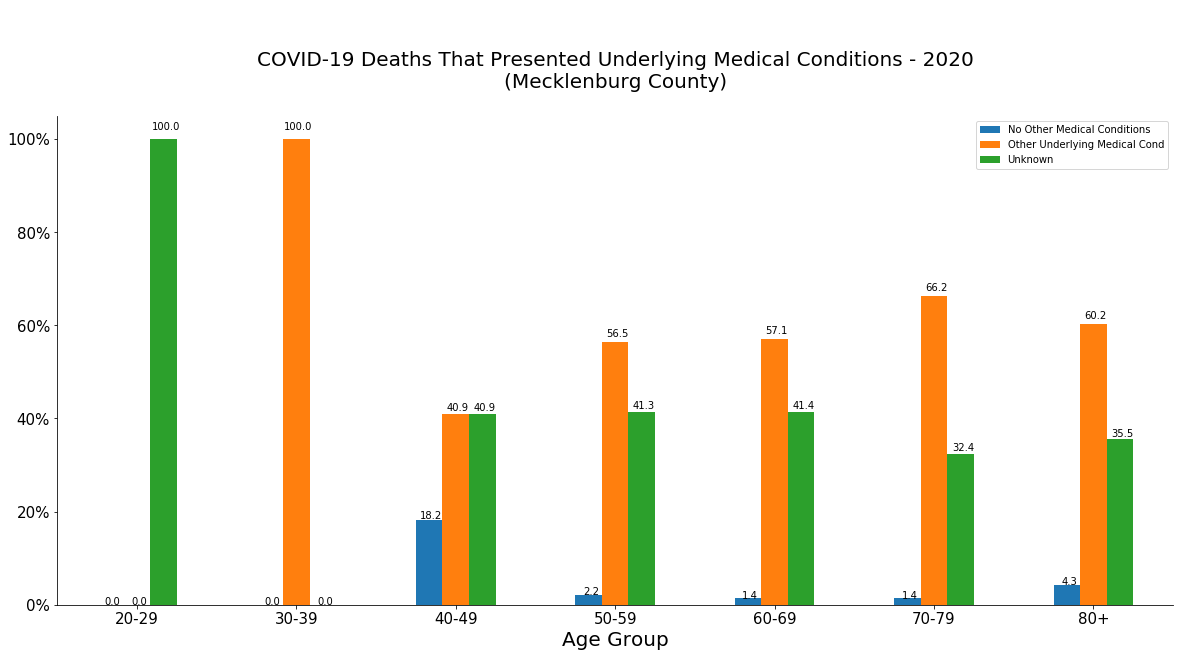

In [33]:
## Plot cond

ax = cond.plot(x='age_group', y=['no_other_p', 'other_cond_p', 'Unknown_p'],
                kind='bar',
                figsize=(20,9),
                rot=0,
                fontsize=15)

## labels on top of bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/1.7, y + height*1.02), ha='center')
    
ax.set_title('\n\nCOVID-19 Deaths That Presented Underlying Medical Conditions - 2020\n(Mecklenburg County)\n', fontsize =20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax.set_xlabel('Age Group', fontsize=20)
ax.legend(['No Other Medical Conditions', 'Other Underlying Medical Cond', 'Unknown']);

# # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Save chart as png file
# ax.figure.savefig(IMAGES/'d_s_rate-by_age.png' )

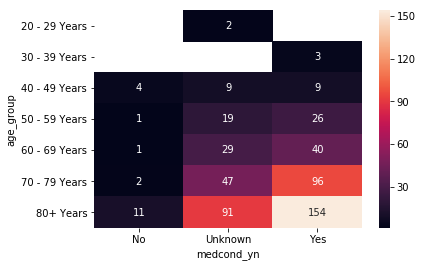

In [34]:
ax = sns.heatmap(deaths.groupby(['age_group','medcond_yn'])['medcond_yn'].count().unstack(), annot=True, fmt='.4g')